In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

C:\Users\tharu\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#Data preprocessing 
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [4]:
#Building Model
cnn = tf.keras.models.Sequential()

In [5]:
#Building CNN layers
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
cnn.add(tf.keras.layers.Dropout(0.25))

In [6]:
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting
#Output Layer
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

In [7]:
#Compiling and training
cnn.compile(optimizer=tf.keras.optimizers.legacy.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [8]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                   

In [9]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10


2197/2197 [==============================] - 2184s 993ms/step - loss: 1.3822 - accuracy: 0.5929 - val_loss: 0.5622 - val_accuracy: 0.8251
Epoch 2/10
2197/2197 [==============================] - 3195s 1s/step - loss: 0.4366 - accuracy: 0.8616 - val_loss: 0.2567 - val_accuracy: 0.9175
Epoch 3/10
2197/2197 [==============================] - 2600s 1s/step - loss: 0.2555 - accuracy: 0.9172 - val_loss: 0.2295 - val_accuracy: 0.9274
Epoch 4/10
2197/2197 [==============================] - 2943s 1s/step - loss: 0.1794 - accuracy: 0.9420 - val_loss: 0.2011 - val_accuracy: 0.9387
Epoch 5/10
2197/2197 [==============================] - 1954s 890ms/step - loss: 0.1337 - accuracy: 0.9559 - val_loss: 0.1758 - val_accuracy: 0.9445
Epoch 6/10
2197/2197 [==============================] - 1946s 886ms/step - loss: 0.1041 - accuracy: 0.9659 - val_loss: 0.1398 - val_accuracy: 0.9586
Epoch 7/10
2197/2197 [==============================] - 3173s 1s/step - loss: 0.0828 - accuracy: 0.9728 - val_los

In [10]:
#Saving model
cnn.save('trained_plant1_disease_model.keras')

In [11]:
training_history.history #Return Dictionary of history

{'loss': [1.382201075553894,
  0.43659448623657227,
  0.2555471956729889,
  0.17944656312465668,
  0.1337086409330368,
  0.10408536344766617,
  0.08280228078365326,
  0.07188994437456131,
  0.060195814818143845,
  0.05358948931097984],
 'accuracy': [0.5928729176521301,
  0.8615691065788269,
  0.9171776175498962,
  0.9420015811920166,
  0.9558574557304382,
  0.9658581614494324,
  0.9728288054466248,
  0.9765416979789734,
  0.9802688956260681,
  0.9830571413040161],
 'val_loss': [0.5621923804283142,
  0.25669577717781067,
  0.22953243553638458,
  0.20106877386569977,
  0.17579278349876404,
  0.13978563249111176,
  0.13071225583553314,
  0.10515925288200378,
  0.11416909843683243,
  0.1755928248167038],
 'val_accuracy': [0.8250625729560852,
  0.9175392389297485,
  0.9274413585662842,
  0.9386523962020874,
  0.9445139765739441,
  0.9585704803466797,
  0.9591964483261108,
  0.9679034948348999,
  0.9680172801017761,
  0.9516276121139526]}

In [12]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


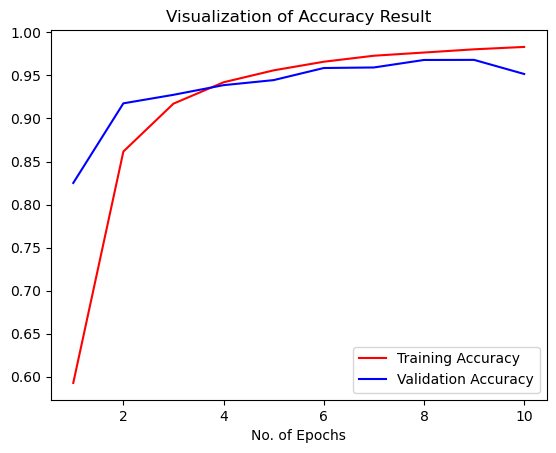

In [13]:
#ACCURACY VISUALIZATION
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

In [14]:
class_name = validation_set.class_names

In [16]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [17]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

17572/17572 [==============================] - 640s 36ms/step


In [18]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [19]:
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [20]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [21]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [22]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.89      0.99      0.94       504
                                 Apple___Black_rot       1.00      0.96      0.98       497
                          Apple___Cedar_apple_rust       0.96      0.94      0.95       440
                                   Apple___healthy       0.98      0.89      0.93       502
                               Blueberry___healthy       0.98      0.96      0.97       454
          Cherry_(including_sour)___Powdery_mildew       0.87      0.99      0.92       421
                 Cherry_(including_sour)___healthy       0.91      1.00      0.95       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.95      0.88      0.91       410
                       Corn_(maize)___Common_rust_       1.00      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.88      0.98      0.

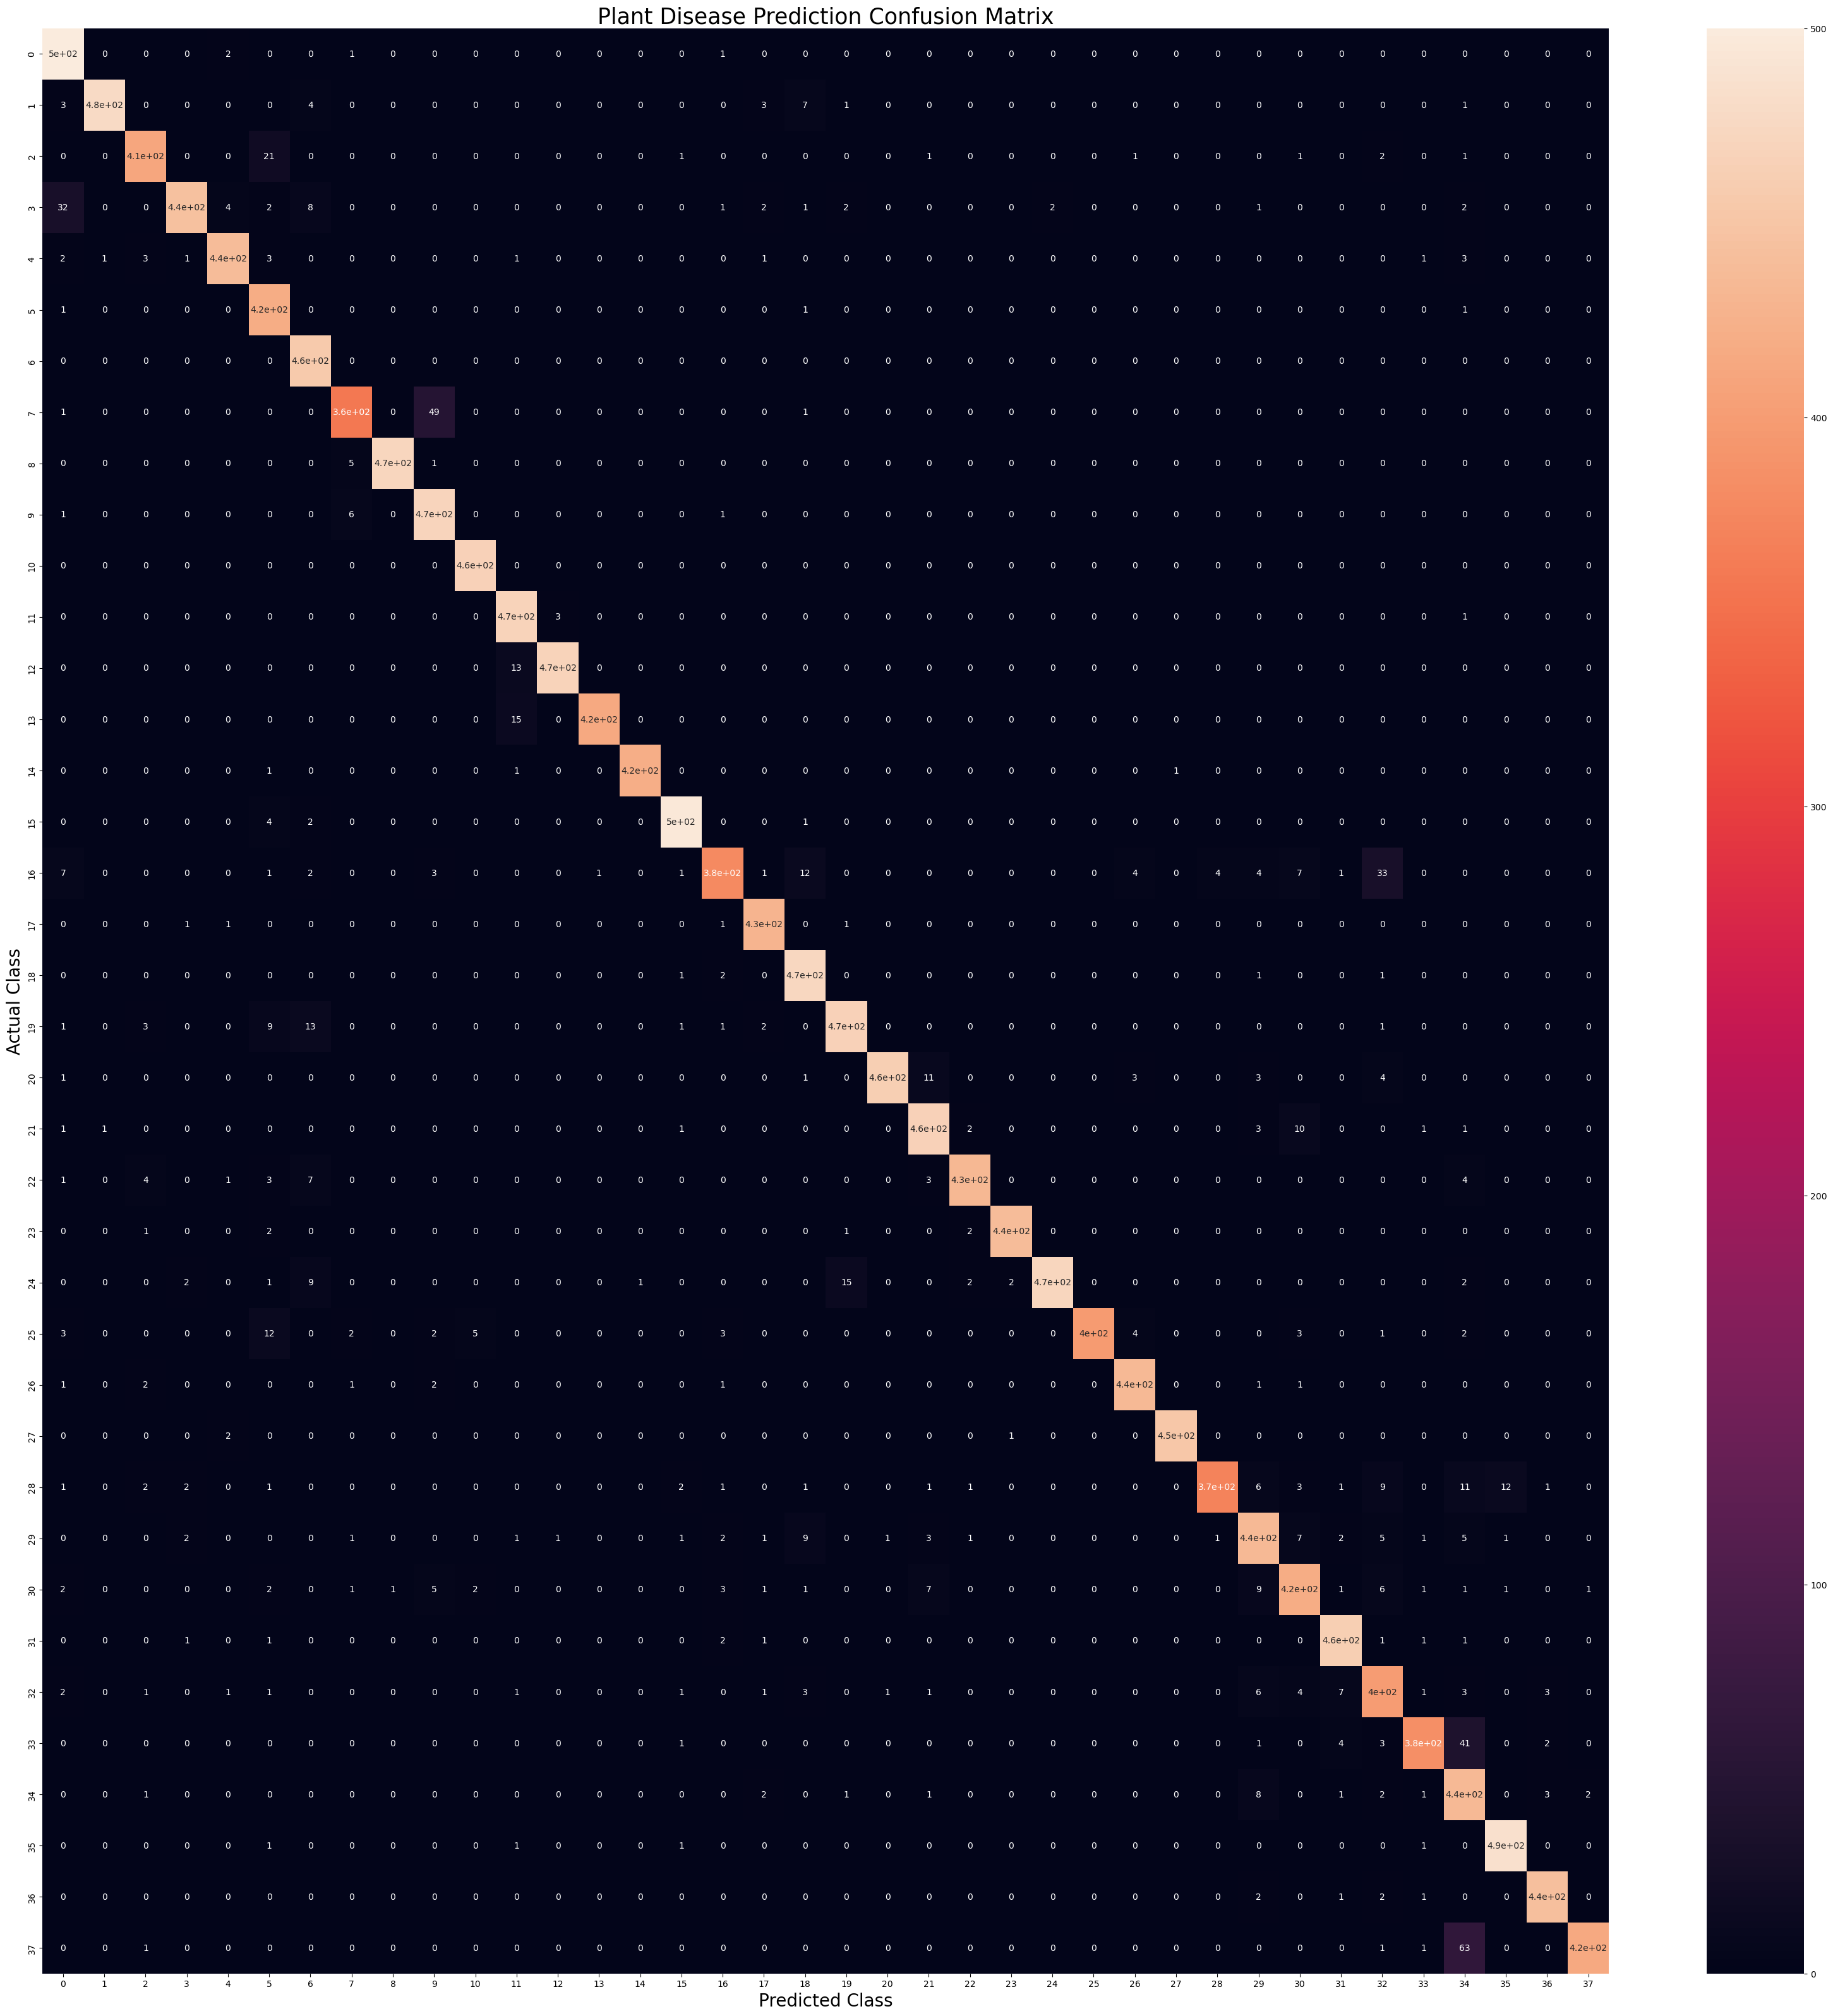

In [23]:
#CONFUSION MATRIX
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()